In [1]:
# allows you to automatically reload modules before executing code,
%load_ext autoreload
%autoreload 2

# Create In-Domain Features

In [40]:
#### Load in data ####
import os
import cv2
import numpy as np
import pandas as pd
from itertools import product
from tqdm import tqdm
from utils import load_images_by_domain, split_images

# Define paths
img_dir = "../OfficeCaltechDomainAdaptation/images"

# Load images by domain
data_by_domain = load_images_by_domain(
    img_dir=img_dir,
    target_size=(300, 300),  # Standardized size
    method="pad",           # Use padding to maintain aspect ratio
    seed=888                # Seed for reproducibility
)

# Split images: Combine amazon and caltech10 into train/val/test
train_data, val_data, test_data = split_images(
    data_by_domain=data_by_domain,
    train_domains=["amazon", "caltech10"],  # Combine these for training and validation
    test_domains=[],                        # Use part of amazon and caltech10 for testing
    train_split=0.7,                        # 60% for training
    val_split=0.2,                          # 20% for validation
    use_train_for_test=True,                # Use part of train_domains for testing
    test_split=0.1,                         # 20% for testing
    seed=888                                # Seed for reproducibility
)

# Summary of splits
print(f"Train images: {len(train_data['images'])}, Train labels: {len(train_data['labels'])}")
print(f"Validation images: {len(val_data['images'])}, Validation labels: {len(val_data['labels'])}")
print(f"Test images: {len(test_data['images'])}, Test labels: {len(test_data['labels'])}")


Train images: 1456, Train labels: 1456
Validation images: 415, Validation labels: 415
Test images: 210, Test labels: 210


## `LBP FEATURES`

In [ ]:
# Import LBP function and grayscale conversion from utils
from utils import extract_lbp_features

# Define LBP parameters
P_values = [4, 8, 16]  # Number of neighbors
R_values = [1, 2, 4, 8]    # Radius
PR_combinations = list(product(P_values, R_values))  # All (P, R) combinations

# Extract LBP features for each split
train_lbp_df = extract_lbp_features(train_data, PR_combinations)
val_lbp_df = extract_lbp_features(val_data, PR_combinations)
test_lbp_df = extract_lbp_features(test_data, PR_combinations)

# Save LBP features to CSV in the 'features' subdirectory
train_lbp_df.to_csv(os.path.join("features", "train_lbp_features.csv"), index=False)
val_lbp_df.to_csv(os.path.join("features", "val_lbp_features.csv"), index=False)
test_lbp_df.to_csv(os.path.join("features", "test_lbp_features.csv"), index=False)

print("LBP feature extraction and saving completed successfully!")

Extracting LBP features from 1456 images...


100%|██████████| 1456/1456 [02:06<00:00, 11.49it/s]


Extracting LBP features from 415 images...


100%|██████████| 415/415 [00:35<00:00, 11.61it/s]


Extracting LBP features from 210 images...


100%|██████████| 210/210 [00:18<00:00, 11.60it/s]


LBP feature extraction and saving completed successfully!


## `GLCM FEATURES`

In [ ]:
from utils import extract_glcm_features_split

# GLCM parameters
glcm_distances = [1, 2, 4, 8]  # Example distances
glcm_angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Example angles in radians

# Extract GLCM features for each split
train_glcm_df = extract_glcm_features_split(train_data, glcm_distances, glcm_angles)
val_glcm_df = extract_glcm_features_split(val_data, glcm_distances, glcm_angles)
test_glcm_df = extract_glcm_features_split(test_data, glcm_distances, glcm_angles)

# Save GLCM features to CSV
import os
os.makedirs("features", exist_ok=True)
train_glcm_df.to_csv(os.path.join("features", "train_glcm_features.csv"), index=False)
val_glcm_df.to_csv(os.path.join("features", "val_glcm_features.csv"), index=False)
test_glcm_df.to_csv(os.path.join("features", "test_glcm_features.csv"), index=False)

print("GLCM feature extraction and saving completed successfully!")


Extracting GLCM features from 1456 images...


  0%|          | 0/1456 [00:00<?, ?it/s]

100%|██████████| 1456/1456 [00:17<00:00, 82.97it/s]


Extracting GLCM features from 415 images...


100%|██████████| 415/415 [00:04<00:00, 83.02it/s]


Extracting GLCM features from 210 images...


100%|██████████| 210/210 [00:02<00:00, 81.43it/s]


GLCM feature extraction and saving completed successfully!


## `RESNET FEATURES`

In [5]:
import os
from utils import compute_resnet_features

# Define dataset splits
dataset_splits = {
    'train': train_data,
    'val': val_data,
    'test': test_data
}

# List of splits to process
splits_to_process = ['train', 'val', 'test']

# Directory to save features
output_dir = "features"
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

# Compute ResNet features
resnet_features = compute_resnet_features(
    dataset_splits=dataset_splits,
    splits_to_process=splits_to_process,
    batch_size=16
)

# Save each split's DataFrame to CSV in the /features directory
for split_name, df in resnet_features.items():
    output_path = os.path.join(output_dir, f"{split_name}_resnet_features.csv")
    df.to_csv(output_path, index=False)
    print(f"Saved {split_name} ResNet features to '{output_path}'.")

print("ResNet feature extraction and saving completed successfully!")


Label to integer mapping: {'backpack': 0, 'bike': 1, 'calculator': 2, 'headphones': 3, 'keyboard': 4, 'laptop': 5, 'monitor': 6, 'mouse': 7, 'mug': 8, 'projector': 9}
Processing train split...
Extracting ResNet features from 1456 images for 'train' split...


Extracting ResNet Features (train split): 100%|██████████| 91/91 [00:02<00:00, 39.30it/s]


ResNet feature extraction completed for 'train' split.
Processing val split...
Extracting ResNet features from 415 images for 'val' split...


Extracting ResNet Features (val split): 100%|██████████| 26/26 [00:00<00:00, 40.94it/s]


ResNet feature extraction completed for 'val' split.
Processing test split...
Extracting ResNet features from 210 images for 'test' split...


Extracting ResNet Features (test split): 100%|██████████| 14/14 [00:00<00:00, 42.99it/s]


ResNet feature extraction completed for 'test' split.
Saved train ResNet features to 'features\train_resnet_features.csv'.
Saved val ResNet features to 'features\val_resnet_features.csv'.
Saved test ResNet features to 'features\test_resnet_features.csv'.
ResNet feature extraction and saving completed successfully!


## `ORB FEATURES`

In [3]:
from utils import get_orb_features
# define best params determined in ORB_Tuning.ipynb
best_params = {'nfeatures': 584, 'patchSize': 11, 'scaleFactor': 1.24, 'n_clusters': 268}

train_orb, kmeans, transformer = get_orb_features(
    imgs=train_data['images'],
    **best_params
)

val_orb, _, _ = get_orb_features(
    imgs=val_data['images'],
    kmeans=kmeans,
    transformer=transformer,
    **best_params,
)

test_orb, _, _ = get_orb_features(
    imgs=test_data['images'],
    kmeans=kmeans,
    transformer=transformer,
    **best_params
)

train_orb_df = pd.DataFrame(train_orb)
train_orb_df.columns = [f"vw_{x}" for x in train_orb_df.columns]
train_orb_df['label'] = train_data['labels']
val_orb_df = pd.DataFrame(val_orb)
val_orb_df.columns = [f"vw_{x}" for x in val_orb_df.columns]
val_orb_df['label'] = val_data['labels']
test_orb_df = pd.DataFrame(test_orb)
test_orb_df.columns = [f"vw_{x}" for x in test_orb_df.columns]
test_orb_df['label'] = test_data['labels']

# Save LBP features to CSV in the 'features' subdirectory
train_orb_df.to_csv(os.path.join("features", "train_orb_bovw_features.csv"), index=False)
val_orb_df.to_csv(os.path.join("features", "val_orb_bovw_features.csv"), index=False)
test_orb_df.to_csv(os.path.join("features", "test_orb_bovw_features.csv"), index=False)

print("ORB Bag of Visual Words feature extraction and saving completed successfully!")

Getting ORB keypoints...


100%|██████████| 1456/1456 [00:09<00:00, 158.86it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 306.14it/s]


Getting ORB keypoints...


100%|██████████| 210/210 [00:00<00:00, 385.75it/s]


ORB Bag of Visual Words feature extraction and saving completed successfully!


## `RGB COLOR FEATURES`

In [3]:
from utils import extract_RGB_features

# Extract RGB features for each split
train_rgb_df = extract_RGB_features(train_data)
val_rgb_df = extract_RGB_features(val_data)
test_rgb_df = extract_RGB_features(test_data)

# Save RGB features to CSV
os.makedirs("features", exist_ok=True)
train_rgb_df.to_csv(os.path.join("features", "train_rgb_features.csv"), index=False)
val_rgb_df.to_csv(os.path.join("features", "val_rgb_features.csv"), index=False)
test_rgb_df.to_csv(os.path.join("features", "test_rgb_features.csv"), index=False)

print("RGB feature extraction and saving completed successfully!")

Extracting mean color channel features from 1456 images...


100%|██████████| 1456/1456 [00:00<00:00, 6087.90it/s]


Extracting mean color channel features from 415 images...


100%|██████████| 415/415 [00:00<00:00, 6004.53it/s]


Extracting mean color channel features from 210 images...


100%|██████████| 210/210 [00:00<00:00, 5636.78it/s]

RGB feature extraction and saving completed successfully!


## `APPLYING TSNE`

c:\Users\rockhopper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


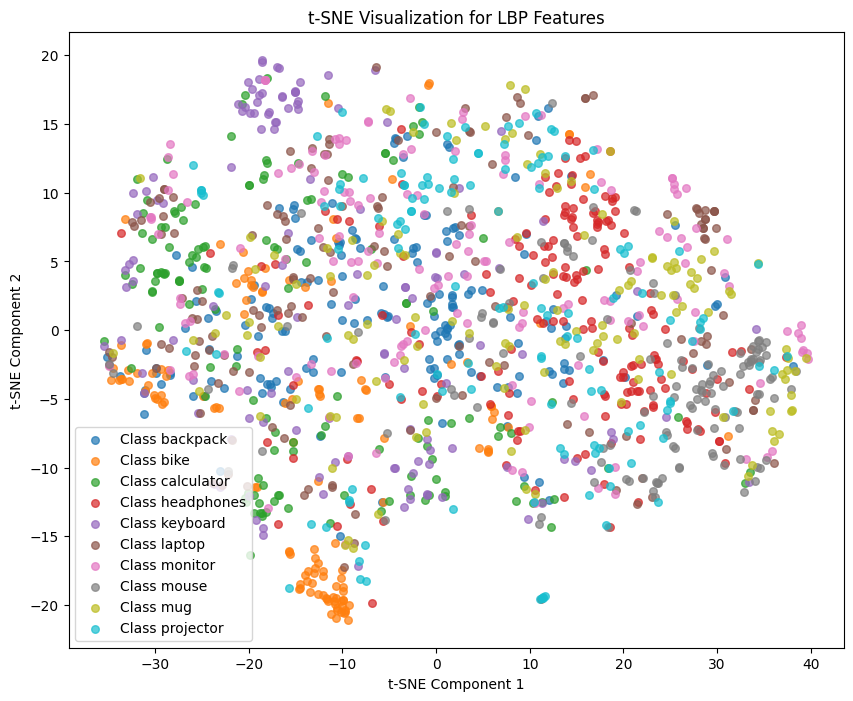

c:\Users\rockhopper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


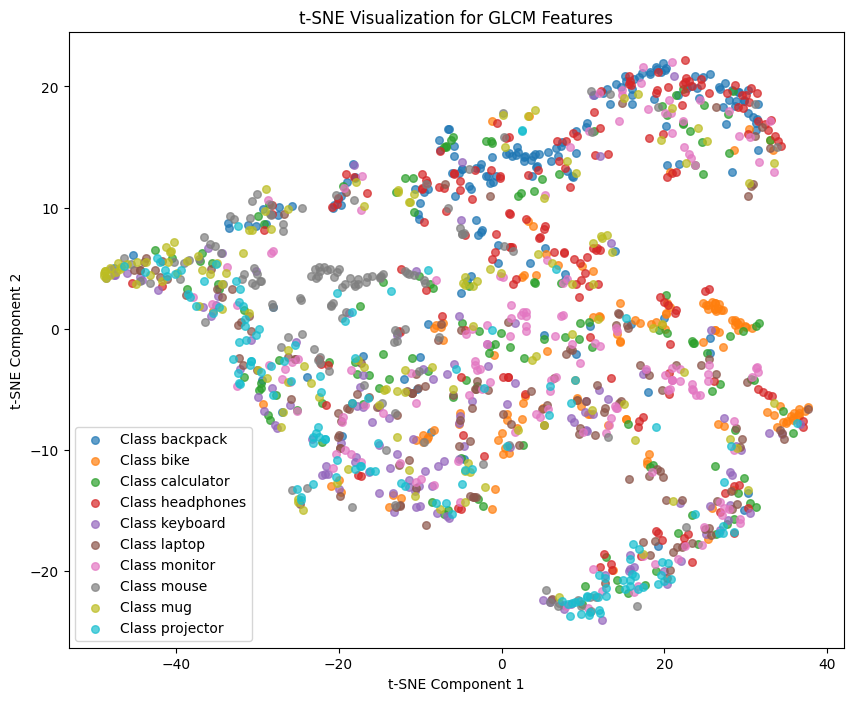

c:\Users\rockhopper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


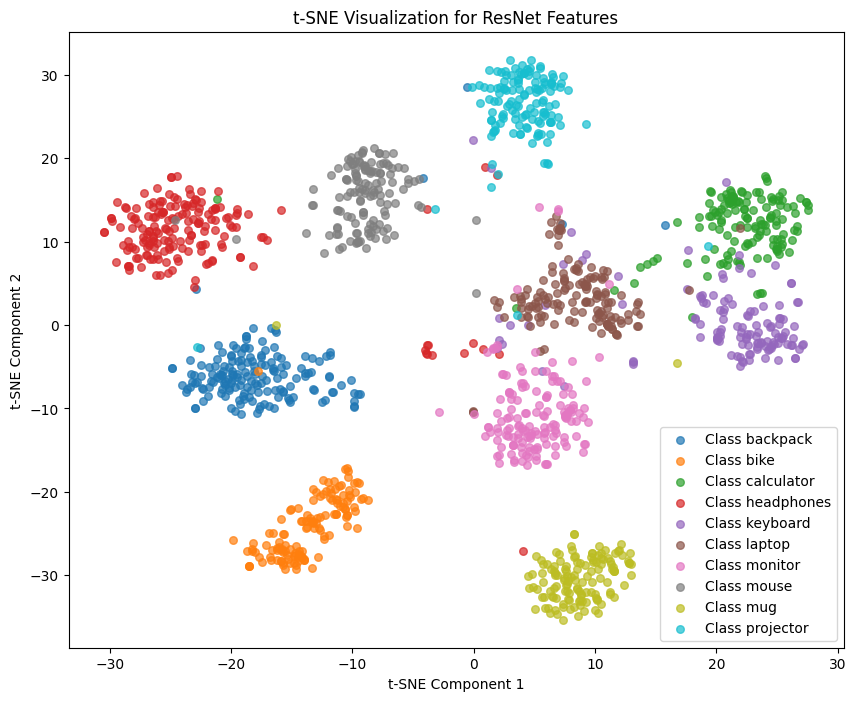

c:\Users\rockhopper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


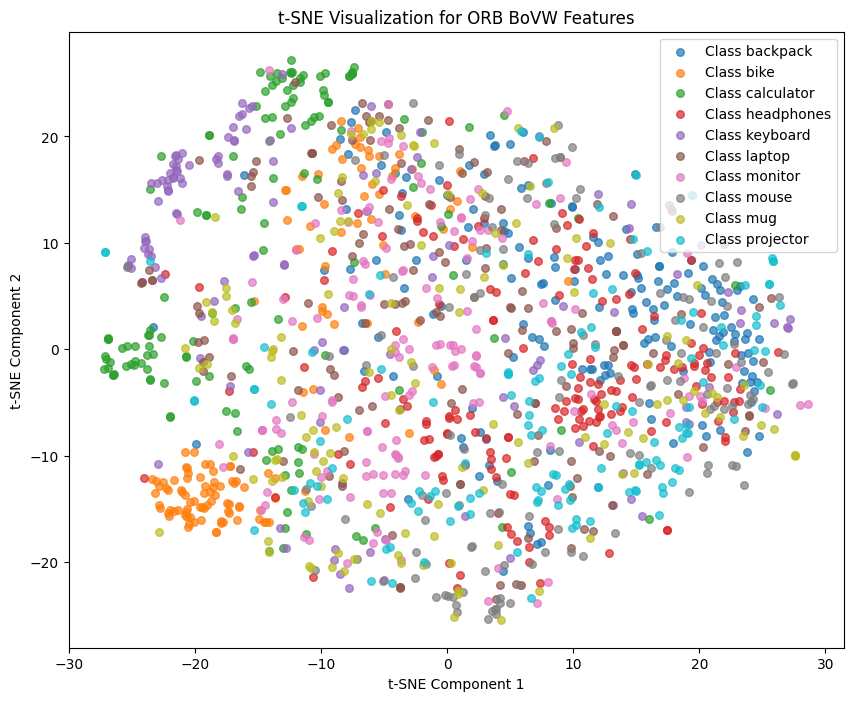

c:\Users\rockhopper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


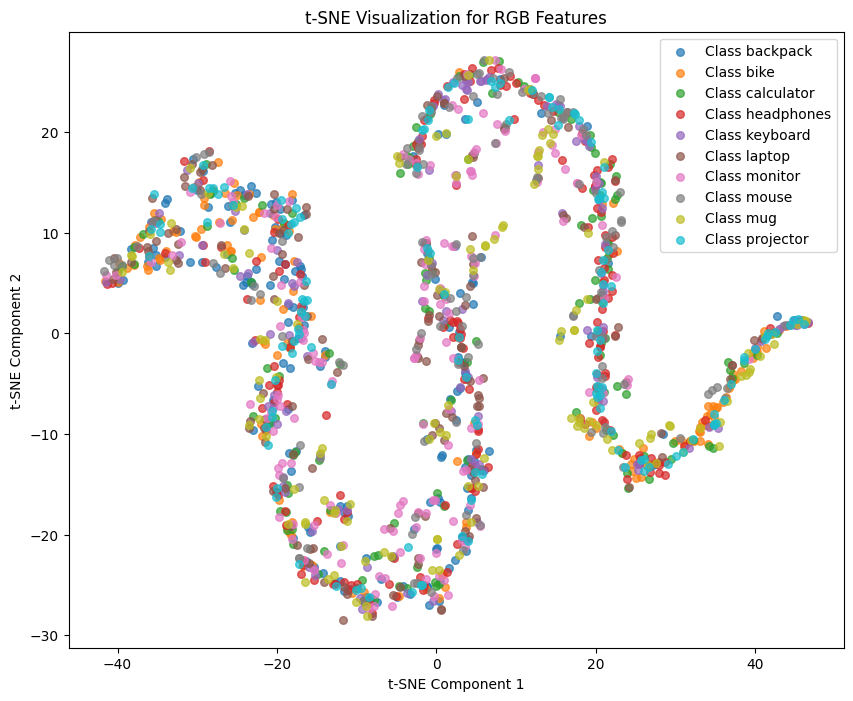

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load CSV files
file_paths = {
    "LBP": r"features/train_lbp_features.csv",
    "GLCM": r"features/train_glcm_features.csv",
    "ResNet": r"features/train_resnet_features.csv",
    "ORB BoVW": r"features/train_orb_bovw_features.csv",
    "RGB": r"features/train_rgb_features.csv",
}

datasets = {}

# Load datasets from CSV files
for method, path in file_paths.items():
    df = pd.read_csv(path)
    features = df.drop(columns=["label"]).values
    labels = df["label"].values
    # Add to the datasets dictionary
    datasets[method] = (features, labels)

# Function to preprocess features
def preprocess_features(features):
    # Replace infinity and NaN values
    features = np.nan_to_num(features, nan=0.0, posinf=1e6, neginf=-1e6)
    # Clip values to a reasonable range
    features = np.clip(features, -1e6, 1e6)
    return features

# Preprocess features for all datasets
for method in datasets:
    features, labels = datasets[method]
    datasets[method] = (preprocess_features(features), labels)

# Function to apply t-SNE
def apply_tsne(features):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
    features_2d = tsne.fit_transform(features)
    return features_2d

# Plot t-SNE results for each method
for method, (features, labels) in datasets.items():
    # Apply t-SNE
    features_2d = apply_tsne(features)
    
    # Plot the results
    plt.figure(figsize=(10, 8))
    for category_id in np.unique(labels):
        idxs = np.where(labels == category_id)
        plt.scatter(features_2d[idxs, 0], features_2d[idxs, 1], 
                    label=f"Class {category_id}", alpha=0.7, s=30)
    
    plt.legend()
    plt.title(f"t-SNE Visualization for {method} Features")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()


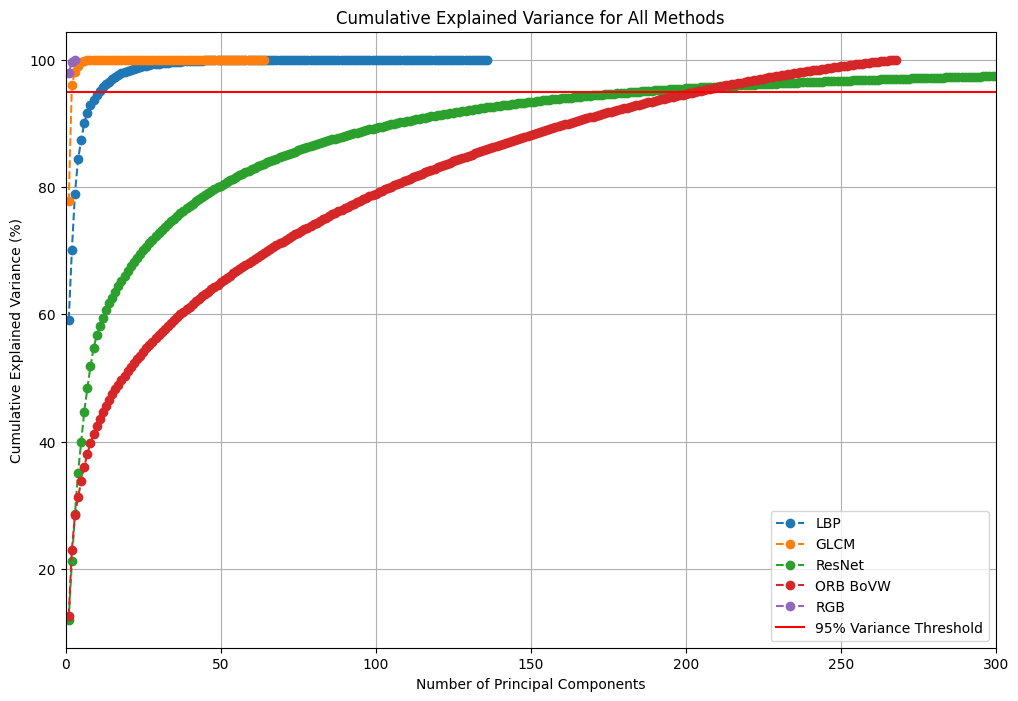

In [4]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Function to plot explained variance ratio for multiple methods on one plot
def plot_explained_variance_multiple(datasets):
    plt.figure(figsize=(12, 8))

    for method, (features, _) in datasets.items():
        pca = PCA()
        pca.fit(features)
        explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_) * 100
        
        plt.plot(
            range(1, len(explained_variance_ratio) + 1),
            explained_variance_ratio,
            marker='o',
            linestyle='--',
            label=f"{method}"
        )

    # Add a horizontal line for 95% explained variance
    plt.axhline(y=95, color='r', linestyle='-', label='95% Variance Threshold')
    
    # Set x-axis limit to 300
    plt.xlim(0, 300)
    
    plt.title("Cumulative Explained Variance for All Methods")
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance (%)")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage: visualize PCA explained variance for all datasets
plot_explained_variance_multiple(datasets)


# Train & Evaluate Model on In-Domain Test Set

## Including ResNet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# File paths for features
file_paths = {
    "LBP": {
        "train": r"features/train_lbp_features.csv",
        "val": r"features/val_lbp_features.csv",
        "test": r"features/test_lbp_features.csv",
    },
    "GLCM": {
        "train": r"features/train_glcm_features.csv",
        "val": r"features/val_glcm_features.csv",
        "test": r"features/test_glcm_features.csv",
    },
    "ResNet": {
        "train": r"features/train_resnet_features.csv",
        "val": r"features/val_resnet_features.csv",
        "test": r"features/test_resnet_features.csv",
    },
    "ORB BoVW": {
        "train": r"features/train_orb_bovw_features.csv",
        "val": r"features/val_orb_bovw_features.csv",
        "test": r"features/test_orb_bovw_features.csv",
    },
    "RGB": {
        "train": r"features/train_rgb_features.csv",
        "val": r"features/val_rgb_features.csv",
        "test": r"features/test_rgb_features.csv",
    }
}

# Step 1: Load features from CSV files
def load_features(file_paths, split_type: str):
    """ 
    - Loads data from the train, val, or test CSV files for all of the features
    - stacks them into one feature set ndarray
    - returns combined features and labels 

    Args:
        file_paths: dictionary of file paths for each method 
        split_type: train, val, or test

    Returns:
        (features, labels): combined features df for all methods, labels for the features
    """
    features = []
    labels = None

    for method, paths in file_paths.items():
        # Load the desired split for all of these features
        df = pd.read_csv(paths[split_type]) 
        print(f"Loading {method} [{split_type}] features ... shape = {df.shape}")
        # Drop label column
        features.append(df.drop(columns=["label"]).values)  

        if labels is None:
            labels = df["label"].values  # Use labels from the first feature type
        else:
            assert np.array_equal(labels, df["label"].values), "Labels mismatch between features!"
    return np.hstack(features), labels  # Combine features horizontally and return labels

# Step 2: Clean invalid values in the features
def clean_features(features):
    """
    Cleans the input features by handling invalid values:
    - Replaces NaN with 0
    - Replaces +inf with 1e6 and -inf with -1e6
    - Clips extreme values to the range [-1e6, 1e6]
    """
    features = np.nan_to_num(features, nan=0.0, posinf=1e6, neginf=-1e6)
    features = np.clip(features, -1e6, 1e6)
    return features

# Load and clean features
# train_features, train_labels = load_features({k: v for k, v in file_paths.items()})
train_features, train_labels = load_features({k: v for k, v in file_paths.items()}, split_type = "train")
train_features = clean_features(train_features)

# val_features, val_labels = load_features({k: {"train": v["val"]} for k, v in file_paths.items()})
val_features, val_labels = load_features({k: v for k, v in file_paths.items()}, split_type = "val")
val_features = clean_features(val_features)

# test_features, test_labels = load_features({k: {"train": v["test"]} for k, v in file_paths.items()})
test_features, test_labels = load_features({k: v for k, v in file_paths.items()}, split_type = "test")
test_features = clean_features(test_features)

# Step 3: Normalize the training features
scaler = StandardScaler()
train_features_normalized = scaler.fit_transform(train_features)

# Step 4: Fit PCA on training features
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% of variance
train_features_reduced = pca.fit_transform(train_features_normalized)

print(f"Number of components capturing 95% variance: {pca.n_components_}")

# Step 5: Transform validation and test features using the same PCA
val_features_normalized = scaler.transform(val_features)  # Use the same scaler
val_features_reduced = pca.transform(val_features_normalized)

test_features_normalized = scaler.transform(test_features)  # Use the same scaler
test_features_reduced = pca.transform(test_features_normalized)

# Step 6: Train an SVM model
print("\nSVM Model WITH ResNet Features:")
print(f"model fit on data: {train_features_reduced.shape = }")
print('-'*50)
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(train_features_reduced, train_labels)

# Step 7: Validate the model
val_predictions = svm_model.predict(val_features_reduced)
val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(val_labels, val_predictions))

# Step 8: Test the model
test_predictions = svm_model.predict(test_features_reduced)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(test_labels, test_predictions))


Loading ResNet [train] features ... shape = (1456, 2049)
Loading ORB BoVW [train] features ... shape = (1456, 269)
Loading RGB [train] features ... shape = (1456, 4)
Loading ResNet [val] features ... shape = (415, 2049)
Loading ORB BoVW [val] features ... shape = (415, 269)
Loading RGB [val] features ... shape = (415, 4)
Loading ResNet [test] features ... shape = (210, 2049)
Loading ORB BoVW [test] features ... shape = (210, 269)
Loading RGB [test] features ... shape = (210, 4)
Number of components capturing 95% variance: 402

SVM Model WITH ResNet Features:
model fit on data: train_features_reduced.shape = (1456, 402)
--------------------------------------------------
Validation Accuracy: 0.9518072289156626
Validation Classification Report:
              precision    recall  f1-score   support

    backpack       0.96      0.94      0.95        52
        bike       0.97      1.00      0.99        35
  calculator       1.00      0.97      0.98        33
  headphones       0.93      0.

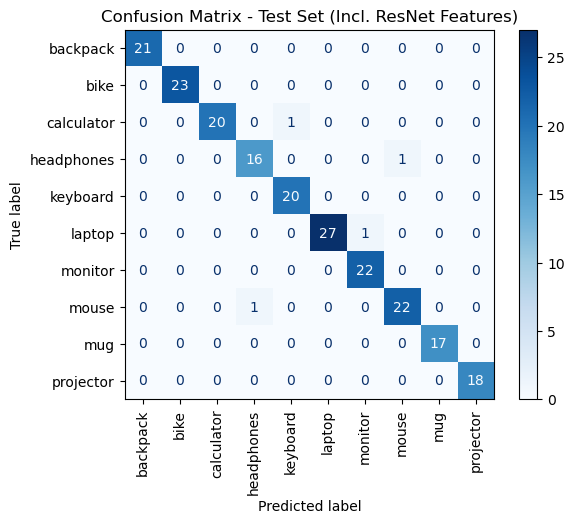

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Generate the confusion matrix for the test set
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(test_labels))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix - Test Set (Incl. ResNet Features)")
plt.xticks(rotation=90)
plt.show()


## Excluding ResNet

In [78]:
# File paths for features WITHOUT ResNet
file_paths_no_resnet = {
    # "LBP": {
    #     "train": r"features/train_lbp_features.csv",
    #     "val": r"features/val_lbp_features.csv",
    #     "test": r"features/test_lbp_features.csv",
    # },
    # "GLCM": {
    #     "train": r"features/train_glcm_features.csv",
    #     "val": r"features/val_glcm_features.csv",
    #     "test": r"features/test_glcm_features.csv",
    # },
    "ORB BoVW": {
        "train": r"features/train_orb_bovw_features.csv",
        "val": r"features/val_orb_bovw_features.csv",
        "test": r"features/test_orb_bovw_features.csv",
    },
    "RGB": {
        "train": r"features/train_rgb_features.csv",
        "val": r"features/val_rgb_features.csv",
        "test": r"features/test_rgb_features.csv"
  }
}

# Use the adjusted file paths
# train_features, train_labels = load_features({k: v for k, v in file_paths_no_resnet.items()})
train_features, train_labels = load_features({k: v for k, v in file_paths_no_resnet.items()}, split_type = "train")
train_features = clean_features(train_features)

# val_features, val_labels = load_features({k: {"train": v["val"]} for k, v in file_paths_no_resnet.items()})
val_features, val_labels = load_features({k: v for k, v in file_paths_no_resnet.items()}, split_type = "val")
val_features = clean_features(val_features)

# test_features, test_labels = load_features({k: {"train": v["test"]} for k, v in file_paths_no_resnet.items()})
test_features, test_labels = load_features({k: v for k, v in file_paths_no_resnet.items()}, split_type = "test")
test_features = clean_features(test_features)

# Step 1: Normalize the training features without PCA
scaler_noDL = StandardScaler()
train_features_normalized = scaler_noDL.fit_transform(train_features)

# Step 2: Use the same scaler to normalize validation and test features
val_features_normalized = scaler_noDL.transform(val_features)
test_features_normalized = scaler_noDL.transform(test_features)

## TESTING ##
# Step 2b: Fit PCA on training features
pca_noDL = PCA(n_components=0.95, random_state=42)  # Retain 95% of variance
train_features_reduced = pca_noDL.fit_transform(train_features_normalized)

# Transform val set
val_features_reduced = pca_noDL.transform(val_features_normalized)
test_features_reduced = pca_noDL.transform(test_features_normalized)
#############

# Step 3: Train an SVM model on the normalized features
print("SVM Model WITHOUT ResNet Features:")
print(f"model fit on data: {train_features_normalized.shape = }")
print('-'*50)
svm_model_noDL = SVC(kernel="linear", random_state=42)
#####
# svm_model_noDL.fit(train_features_normalized, train_labels)
svm_model_noDL.fit(train_features_reduced, train_labels)
#####

# Step 4: Validate the model
#####
# val_predictions = svm_model_noDL.predict(val_features_normalized)
val_predictions = svm_model_noDL.predict(val_features_reduced)
#####
val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(val_labels, val_predictions))

# Step 5: Test the model
#####
# test_predictions = svm_model_noDL.predict(test_features_normalized)
test_predictions = svm_model_noDL.predict(test_features_reduced)
#####
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(test_labels, test_predictions))

Loading ORB BoVW [train] features ... shape = (1456, 269)
Loading RGB [train] features ... shape = (1456, 4)
Loading ORB BoVW [val] features ... shape = (415, 269)
Loading RGB [val] features ... shape = (415, 4)
Loading ORB BoVW [test] features ... shape = (210, 269)
Loading RGB [test] features ... shape = (210, 4)
SVM Model WITHOUT ResNet Features:
model fit on data: train_features_normalized.shape = (1456, 271)
--------------------------------------------------
Validation Accuracy: 0.5036144578313253
Validation Classification Report:
              precision    recall  f1-score   support

    backpack       0.45      0.50      0.47        52
        bike       0.71      0.63      0.67        35
  calculator       0.57      0.79      0.66        33
  headphones       0.48      0.69      0.57        39
    keyboard       0.42      0.30      0.35        37
      laptop       0.45      0.36      0.40        50
     monitor       0.58      0.56      0.57        55
       mouse       0.45  

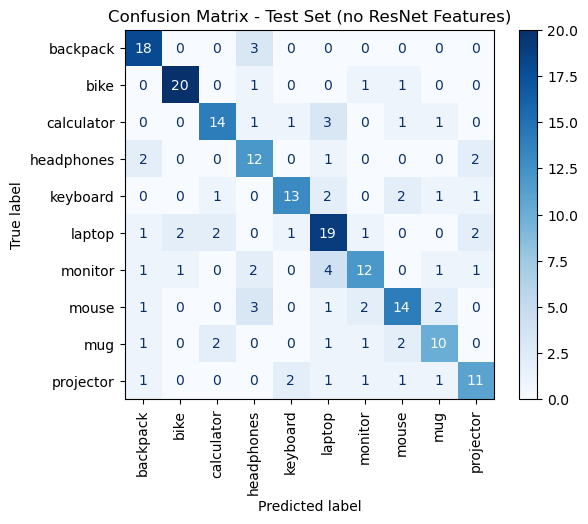

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Generate the confusion matrix for the test set
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(test_labels))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix - Test Set (no ResNet Features)")
plt.xticks(rotation=90)
plt.show()


# Create Out-of-Domain Features

In [36]:
# Extract only test data from the "dslr" domain
_, _, dslr_webcam_test = split_images(
    data_by_domain=data_by_domain,
    train_domains=[],            # No training domains needed
    test_domains=["dslr", "webcam"],       # Use only the "dslr" domain for testing
    train_split=0.0,             # No training data
    val_split=0.0,               # No validation data
    test_split=1.0,              # Use all data for testing
    use_train_for_test=False,    # Do not mix training domains with testing
    seed=888                     # Ensure reproducibility
)

# Print the number of images and labels in the dslr test set
print(f"Dslr Test images: {len(dslr_webcam_test['images'])}, Dslr Test labels: {len(dslr_webcam_test['labels'])}")


Dslr Test images: 452, Dslr Test labels: 452


In [8]:
import os
import numpy as np
import pandas as pd
from utils import (
    extract_gabor_features_split,
    extract_glcm_features_split,
    extract_lbp_features,
    extract_resnet_features_split,
    extract_RGB_features,
    compute_resnet_features,
    get_orb_features
)
from itertools import product

# Define file paths
dslr_webcam_file_paths = {
    "LBP": {"test": r"features/dslr_webcam_test_lbp_features.csv"},
    "GLCM": {"test": r"features/dslr_webcam_test_glcm_features.csv"},
    # "Gabor": {"test": r"features/dslr_webcam_test_gabor_features.csv"},
    "ResNet": {"test": r"features/dslr_webcam_test_resnet_features.csv"},
    "ORB BoVW": {"test": r"features/dslr_webcam_test_orb_bovw_features.csv"},
    "RGB": {"test": r"features/dslr_webcam_test_rgb_features.csv",
    }
}

# Directory to save features
output_dir = "features"
os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists

# DSLR and Webcam Test Data
dslr_webcam_test_data = dslr_webcam_test["images"]
dslr_webcam_test_labels = dslr_webcam_test["labels"]

# Wrap DSLR test data into a dictionary (as required by functions)
dslr_webcam_test_split_data = {
    "images": dslr_webcam_test_data,
    "labels": dslr_webcam_test_labels
}


# ---------------------- LBP Feature Extraction ----------------------
# Define LBP parameters
P_values = [4, 8, 16]  # Number of neighbors
R_values = [1, 2, 4, 8]  # Radius
PR_combinations = list(product(P_values, R_values))  # All (P, R) combinations

# Extract LBP features
dslr_webcam_lbp_df = extract_lbp_features(dslr_webcam_test_split_data, PR_combinations)
dslr_webcam_lbp_df["label"] = dslr_webcam_test_labels  # Add labels
# lbp_features_path = os.path.join(output_dir, "dslr_webcam_test_lbp_features.csv")
# dslr_webcam_lbp_df.to_csv(lbp_features_path, index=False)
dslr_webcam_lbp_df.to_csv(dslr_webcam_file_paths["LBP"]["test"], index=False)

# ---------------------- GLCM Feature Extraction ----------------------
# Define GLCM parameters
glcm_distances = [1, 2, 4, 8]
glcm_angles = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Radians

# Extract GLCM features
dslr_webcam_glcm_df = extract_glcm_features_split(dslr_webcam_test_split_data, glcm_distances, glcm_angles)
dslr_webcam_glcm_df["label"] = dslr_webcam_test_labels  # Add labels
# glcm_features_path = os.path.join(output_dir, "dslr_webcam_test_glcm_features.csv")
# dslr_webcam_glcm_df.to_csv(glcm_features_path, index=False)
dslr_webcam_glcm_df.to_csv(dslr_webcam_file_paths["GLCM"]["test"], index=False)

# ---------------------- RGB Feature Extraction ----------------------
# Extract RGB features
dslr_webcam_rgb_df = extract_RGB_features(dslr_webcam_test_split_data)
dslr_webcam_rgb_df["label"] = dslr_webcam_test_labels  # Add labels
# rgb_features_path = os.path.join(output_dir, "dslr_webcam_test_rgb_features.csv")
# dslr_webcam_rgb_df.to_csv(rgb_features_path, index=False)
dslr_webcam_rgb_df.to_csv(dslr_webcam_file_paths["RGB"]["test"], index=False)

# ---------------------- ResNet Feature Extraction ----------------------
# Define dataset splits
dataset_splits = {
    "test": dslr_webcam_test_split_data
}
splits_to_process = ["test"]

# Compute and save ResNet features
resnet_features = compute_resnet_features(
    dataset_splits=dataset_splits,
    splits_to_process=splits_to_process,
    batch_size=16
)

# Access the test DataFrame
test_features_df = resnet_features["test"]

# Example: Save the DataFrame to a CSV file if needed
# test_features_df.to_csv("dslr_webcam_test_resnet_features.csv", index=False)
test_features_df.to_csv(dslr_webcam_file_paths["ResNet"]["test"], index=False)


# ---------------------- ORB + BOVW Feature Extraction ----------------------
# Define best parameters determined from previous tuning
best_params = {'nfeatures': 584, 'patchSize': 11, 'scaleFactor': 1.24, 'n_clusters': 268}

# Extract ORB features for the test data
# NOTE: `kmeans` and transformer both created in the `orb feature` cell, you need to run that first
test_orb, _, _ = get_orb_features(
    imgs=dslr_webcam_test["images"],
    kmeans=kmeans,
    transformer=transformer,
    **best_params
)

# Convert ORB features into a DataFrame
test_orb_df = pd.DataFrame(test_orb, columns=[f"vw_{x}" for x in range(test_orb.shape[1])])
test_orb_df['label'] = dslr_webcam_test["labels"]  # Add labels to the DataFrame

# Save ORB BOVW features to a CSV file
# test_features_path = os.path.join(output_dir, "dslr_webcam_test_orb_bovw_features.csv")
# test_orb_df.to_csv(test_features_path, index=False)
test_orb_df.to_csv(dslr_webcam_file_paths["ORB BoVW"]["test"], index=False)


Extracting LBP features from 452 images...


100%|██████████| 452/452 [00:36<00:00, 12.48it/s]


Extracting GLCM features from 452 images...


100%|██████████| 452/452 [00:06<00:00, 65.52it/s]


Extracting mean color channel features from 452 images...


100%|██████████| 452/452 [00:00<00:00, 7265.34it/s]


Label to integer mapping: {'backpack': 0, 'bike': 1, 'calculator': 2, 'headphones': 3, 'keyboard': 4, 'laptop': 5, 'monitor': 6, 'mouse': 7, 'mug': 8, 'projector': 9}
Processing test split...
Extracting ResNet features from 452 images for 'test' split...


Extracting ResNet Features (test split): 100%|██████████| 29/29 [00:03<00:00,  7.42it/s]


ResNet feature extraction completed for 'test' split.
Getting ORB keypoints...


100%|██████████| 452/452 [00:01<00:00, 357.55it/s]


# Evaluate Model on Out-of-Domain Test Set

## Including ResNet

In [ ]:
# Define file paths
dslr_webcam_file_paths = {
    "LBP": {"test": r"features/dslr_webcam_test_lbp_features.csv"},
    "GLCM": {"test": r"features/dslr_webcam_test_glcm_features.csv"},
    # "Gabor": {"test": r"features/dslr_webcam_test_gabor_features.csv"},
    "ResNet": {"test": r"features/dslr_webcam_test_resnet_features.csv"},
    "ORB BoVW": {"test": r"features/dslr_webcam_test_orb_bovw_features.csv"},
    "RGB": {"test": r"features/dslr_webcam_test_rgb_features.csv"}
}

# Load and clean DSLR test features with resnet
dslr_webcam_test_features, dslr_webcam_test_labels = load_features(dslr_webcam_file_paths, split_type = "test")
dslr_webcam_test_features = clean_features(dslr_webcam_test_features)

# Normalize the training features
dslr_webcam_test_features_normalized = scaler.transform(dslr_webcam_test_features)

# Fit PCA on training features for resnet data
dslr_webcam_test_features_reduced = pca.transform(dslr_webcam_test_features_normalized)


Loading ResNet [test] features ... shape = (452, 2049)
Loading ORB BoVW [test] features ... shape = (452, 269)
Loading RGB [test] features ... shape = (452, 4)



SVM Model performance -- out of domain -- WITH ResNet Features:
model fit on data: dslr_webcam_test_features_reduced.shape = (452, 402)
--------------------------------------------------
DSLR & Webcam Test Accuracy: 0.915929203539823
DSLR & Webcam Test Classification Report:
              precision    recall  f1-score   support

    backpack       0.79      1.00      0.88        41
        bike       1.00      1.00      1.00        42
  calculator       0.98      0.93      0.95        43
  headphones       0.89      1.00      0.94        40
    keyboard       0.71      1.00      0.83        37
      laptop       0.93      0.74      0.82        54
     monitor       1.00      0.71      0.83        65
       mouse       1.00      0.98      0.99        42
         mug       1.00      1.00      1.00        35
   projector       0.95      0.98      0.96        53

    accuracy                           0.92       452
   macro avg       0.92      0.93      0.92       452
weighted avg       

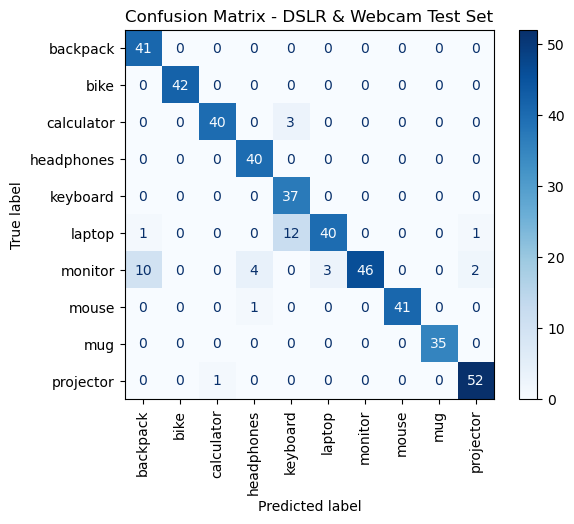

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

#  Evaluate the model on DSLR test features
# Step 6: Train an SVM model
print("\nSVM Model performance -- out of domain -- WITH ResNet Features:")
print(f"model fit on data: {dslr_webcam_test_features_reduced.shape = }")
print('-'*50)

# Evaluate the model on DSLR test features
dslr_webcam_test_predictions = svm_model.predict(dslr_webcam_test_features_reduced)
dslr_webcam_test_accuracy = accuracy_score(dslr_webcam_test_labels, dslr_webcam_test_predictions)

# Print classification report and accuracy
print(f"DSLR & Webcam Test Accuracy: {dslr_webcam_test_accuracy}")
print("DSLR & Webcam Test Classification Report:")
print(classification_report(dslr_webcam_test_labels, dslr_webcam_test_predictions))

# Compute confusion matrix
conf_matrix = confusion_matrix(dslr_webcam_test_labels, dslr_webcam_test_predictions)

# Display confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(dslr_webcam_test_labels))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix - DSLR & Webcam Test Set")
plt.show()


## Excluding ResNet

In [79]:
dslr_webcam_file_paths_noDL = {
    # "LBP": {"test": r"features/dslr_webcam_test_lbp_features.csv"},
    # "GLCM": {"test": r"features/dslr_webcam_test_glcm_features.csv"},
    "ORB BoVW": {"test": r"features/dslr_webcam_test_orb_bovw_features.csv"},
    "RGB": {"test": r"features/dslr_webcam_test_rgb_features.csv"}
}

# Load and clean DSLR test features
dslr_webcam_test_features, dslr_webcam_test_labels = load_features(dslr_webcam_file_paths_noDL, split_type = "test")
dslr_webcam_test_features = clean_features(dslr_webcam_test_features)

# Step 3: Normalize the training features
dslr_webcam_test_features_normalized = scaler_noDL.transform(dslr_webcam_test_features)

# Step 3b: Apply PCA fit on the training features
dslr_webcam_test_features_reduced = pca_noDL.transform(dslr_webcam_test_features_normalized)

Loading ORB BoVW [test] features ... shape = (452, 269)
Loading RGB [test] features ... shape = (452, 4)



SVM Model performance -- out of domain -- WITHOUT ResNet Features:
model fit on data: dslr_webcam_test_features_reduced.shape = (452, 217)
--------------------------------------------------
DSLR & Webcam Test Accuracy: 0.4247787610619469
DSLR & Webcam Test Classification Report:
              precision    recall  f1-score   support

    backpack       0.38      0.51      0.44        41
        bike       0.95      0.88      0.91        42
  calculator       0.53      0.37      0.44        43
  headphones       0.40      0.62      0.49        40
    keyboard       0.31      0.51      0.38        37
      laptop       0.27      0.26      0.27        54
     monitor       0.51      0.28      0.36        65
       mouse       0.44      0.64      0.52        42
         mug       0.24      0.23      0.24        35
   projector       0.32      0.13      0.19        53

    accuracy                           0.42       452
   macro avg       0.44      0.44      0.42       452
weighted avg   

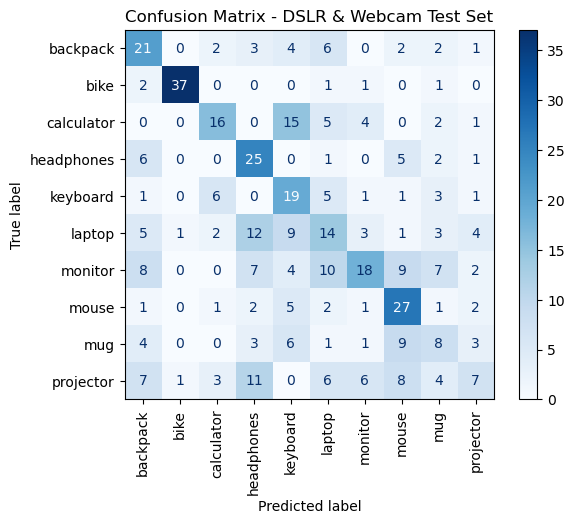

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#  Evaluate the model on DSLR test features
# Step 6: Train an SVM model
print("\nSVM Model performance -- out of domain -- WITHOUT ResNet Features:")
print(f"model fit on data: {dslr_webcam_test_features_reduced.shape = }")
print('-'*50)

# Evaluate the model on DSLR test features
dslr_webcam_test_predictions = svm_model_noDL.predict(dslr_webcam_test_features_reduced)
dslr_webcam_test_accuracy = accuracy_score(dslr_webcam_test_labels, dslr_webcam_test_predictions)

# Print classification report and accuracy
print(f"DSLR & Webcam Test Accuracy: {dslr_webcam_test_accuracy}")
print("DSLR & Webcam Test Classification Report:")
print(classification_report(dslr_webcam_test_labels, dslr_webcam_test_predictions))

# Compute confusion matrix
conf_matrix = confusion_matrix(dslr_webcam_test_labels, dslr_webcam_test_predictions)

# Display confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(dslr_webcam_test_labels))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix - DSLR & Webcam Test Set")
plt.show()